In [1]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import requests
import copy
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

In [2]:
model_id = 'microsoft/Florence-2-large'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True).eval().cuda()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input

    inputs = processor(text=prompt, images=image, return_tensors="pt")
    generated_ids = model.generate(
        input_ids=inputs["input_ids"].cuda(),
        pixel_values=inputs["pixel_values"].cuda(),
        max_new_tokens=1024,
        early_stopping=False,
        do_sample=False,
        num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )

    return parsed_answer

G:\anaconda3\envs\Florence\lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


{'<MORE_DETAILED_CAPTION>': 'The image is a black and white X-ray of a human foot. The foot appears to be in good condition, with no visible signs of injury or discomfort. The bones are clearly visible, with the bones appearing to be slightly bent and twisted. The ankle is also visible in the image, with a small fracture in the center. The fracture is located on the right side of the foot, and the bones are arranged in a symmetrical pattern around the ankle. The image is labeled with the letters "a" at the top, indicating that it is an X-Ray.'}


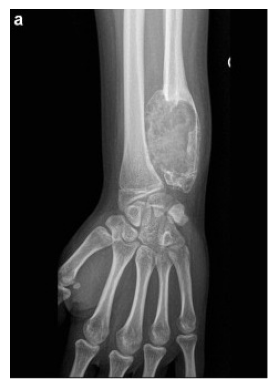

{'<MORE_DETAILED_CAPTION>': "The image is a collage of three photographs. The first photograph on the top left shows a close-up of a person's ear with a red spot on it. The second photograph in the top right shows the same person's head and neck. The third photograph is a black and white ultrasound scan.\n\nThe fourth photograph is in the bottom left corner of the image. The ultrasound scan shows a red and blue area in the center of the ear. The red area appears to be a tumor or a tumor, and it is surrounded by a green line. The blue area is a small amount of blood, which is likely the result of the tumor. The image is taken from a top-down perspective, and the background is black."}


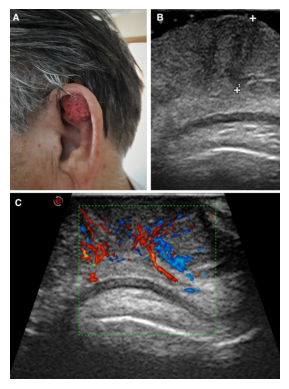

{'<MORE_DETAILED_CAPTION>': 'The image is a black and white MRI scan of a human skull. The scan is divided into two sections, with the left side showing the skull and the right side showing a cross-sectional view of the skull.\n\nThe skull is shown in the center of the image, with a red square in the middle. The skull appears to be in the process of being examined, as there are several small white dots scattered around the skull, likely indicating the presence of a tumor or other medical abnormalities. The red square is likely a reference point for the tumor, as it is located in the top right corner of the scan. The image is taken from a top-down view, and the background is black, making the skull stand out.'}


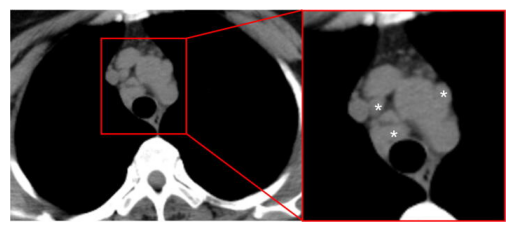

{'<MORE_DETAILED_CAPTION>': 'The image is a black and white CT scan of a human lung. The image appears to be a cross-sectional view of the lungs, with the left and right sides of the image visible. The left side of the lung is slightly larger than the right side, and there are several small white dots scattered throughout the image. The right side is smaller and has a small black dot in the center. The white dots appear to be blood vessels or blood vessels, which are responsible for the flow of blood from the lungs to the lungs.\n\nThe image also shows a few small white circles, which could be blood cells or other medical structures. These circles are likely the blood vessels that make up the lungs and the surrounding tissue. The blood vessels are also visible in the image, and they are arranged in a circular pattern around the central and outer edges. The overall appearance of this image is that of a large, circular area in the lung, which is likely the location of a blood vessel.'}


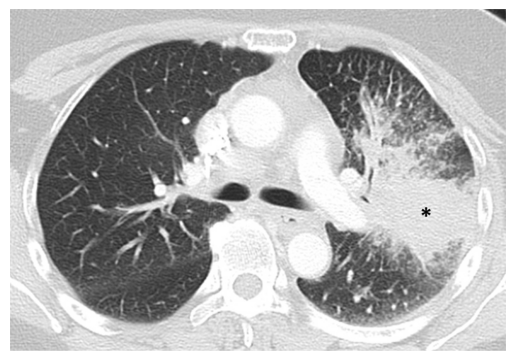

{'<MORE_DETAILED_CAPTION>': 'The image is a collage of four MRI scans of the brain, labeled as "FLAIR", "DA", and "A". The scans are arranged in a grid-like pattern, with each scan showing a different view of the human brain.\n\nThe first scan on the top left shows a normal brain with a large area in the center, which appears to be the cerebellum. The area is surrounded by a small amount of blood vessels, which are visible in the top right corner of the image. The brain is divided into four sections, each with a different color scheme - black, white, and gray. The top left section shows the brainstem, the top middle section shows a small area of the cerebrospinal cord, and the bottom right section shows an axial view of a person\'s brain, which is visible on the bottom left side of the scan. The image is labeled with the letters "A", "D", "E", "F", "G", "H", "J", "K", "L", "M", "N", "O", "R", "S", "T", "U", "V", "W", "Z", "X", "Y", "A" and "Z".\n\nAll four scans appear to be in good co

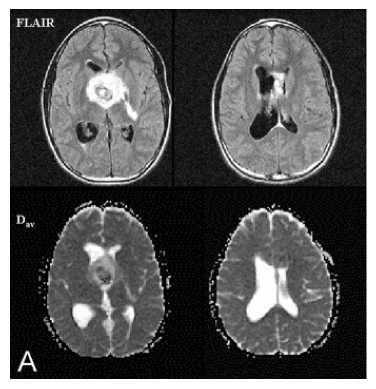

{'<MORE_DETAILED_CAPTION>': 'The image is a collage of four black and white MRI images of the head and neck. The images are arranged in a grid-like pattern, with each image showing a different view of the brain. \n\nThe first image on the top left shows the brain in a normal position, with the left side of the image being the largest and the right side being the smallest. The brain appears to be in a state of disrepair, with some areas appearing to be damaged or discolored. The image is labeled with the letters "A", "B", "C", "D", "E", "F", "G", "H", "J", "K", "L", "M", and "E".\n\nIn the top right image, there is a close-up view of a skull with a large, circular hole in the center. The skull is surrounded by a thin, white line, which is likely the location of the tumor.\n\nBelow the skull, there are two smaller images, one showing the skull and the other showing the surrounding area. The top left image shows the skull with the tumor, while the bottom right image shows a larger, circul

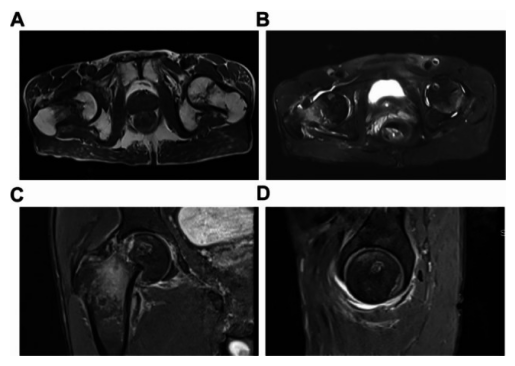

{'<MORE_DETAILED_CAPTION>': 'The image is a cross-sectional view of a tissue sample, showing three different sections of the tissue. The tissue appears to be stained with a purpleish-purple color, and there are three black arrows pointing towards the left side of the image. The arrows indicate the direction of the blood flow through the tissue, which is marked with a red line.\n\nThe first section on the left shows a small amount of blood vessels, which appear to be blood vessels. The blood vessels are arranged in a radial pattern, with the red line extending from the top left corner to the bottom right corner. The red line is likely a blood vessel, as indicated by the black arrows. The image is labeled with the letters "A", "B", "C", and "D" at the top, indicating that it is a magnification magnification of the sample. The second section in the middle shows a larger blood vessel with a smaller blood vessel in the center, and the third section is labeled as "Week 1" and "Week 2".\n\nOv

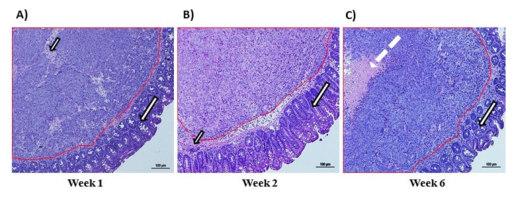

{'<MORE_DETAILED_CAPTION>': 'The image is a black and white MRI scan of a human heart. The heart appears to be in the center of the image, with the left and right ventricles visible. The left ventricle is located on the left side of the heart, and the right ventricular artery is on the right side. The artery is connected to the heart via a series of wires, which are visible in the image.\n\nThe image also shows the location of the pulmonary artery, which is located in the top left corner. The pulmonary artery has a small amount of blood vessels, which appear to be blood vessels in the heart. There are also several arteries and veins visible, which may be nerves or arteries. The image is labeled with the names of the arteries, including PA, AO, RA, LV, and RV.'}


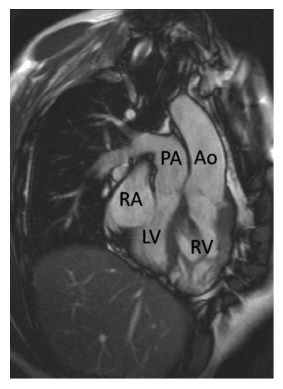

{'<MORE_DETAILED_CAPTION>': 'The image is a close-up of a microscopic view of a tissue sample. The tissue appears to be a type of organelle, with a circular shape and intricate patterns. The surface of the tissue is covered in small, irregularly shaped cells, which are white and appear to be stained with a light-colored dye. The cells are arranged in a radial pattern, with some overlapping each other. The image is taken from a top-down perspective, looking down on the tissue. The background is black, making the tissue stand out.'}


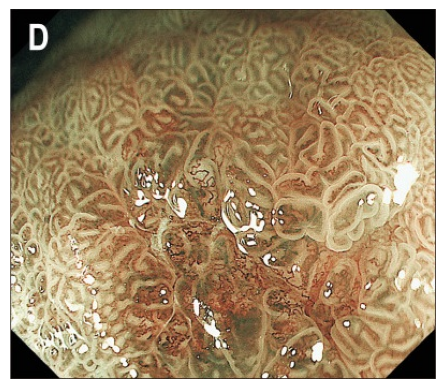

{'<MORE_DETAILED_CAPTION>': 'The image is an X-ray of a human chest, specifically the upper chest area. The image is black and white and appears to be an anteroposterior view of the chest. The chest is shown in a straight line, with the left side of the image showing the rib cage and the right side showing the airway. The rib cage is divided into two sections, with a large area in the center and two smaller sections on either side. The airway is visible in the top left corner, and there is a small arrow pointing to the left chest area, which is likely indicating the location of a small amount of air in the air. The arrow is pointing towards the chest, indicating that the air is not in the correct position. The background of the X-rays is white, and the image is framed by a thin black border.'}


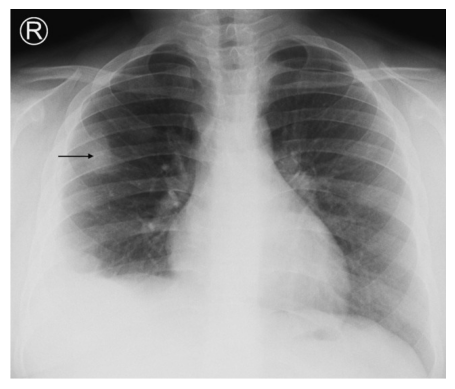

In [7]:
# Load Paper Samples for later testing
sample_file = "../Datasets/Paper Samples/Samples/Samples.csv"
sample_image_folder = "../Datasets/Paper Samples/Samples/Images"
sample_df = pd.read_csv(sample_file)
sample_df = sample_df[['Caption', 'Image']]
sample_df['Generated Caption'] = ""

# Add the image folder path to the 'Image' column to create full image paths
sample_df['Image'] = sample_image_folder + "/" + sample_df['Image']

# Display the updated DataFrame
sample_df

for index, row in sample_df.iterrows():
    image_path = row['Image']
    
    # Open the image
    image = Image.open(image_path).convert("RGB")
    
    task_prompt = "<MORE_DETAILED_CAPTION>"
    generated_caption = run_example(task_prompt=task_prompt)
    
    # Store the generated caption in the DataFrame
    sample_df.at[index, 'Generated Caption'] = generated_caption

    print(generated_caption)
    # Display the image and the generated caption as a multiline paragraph
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    
    plt.show()